<a href="https://colab.research.google.com/github/IagoNeres55/Analise-de-Dados-Python/blob/main/MiniProjetoDNC_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fomos contratados pelo Walmart com o objetivo de analisar as vendas de 45 lojas e através dessa análise apontar quais dessas lojas oferece o melhore retorno para ser investida.

Importando Bibliotecas que iremos utilizar durante nossa análise

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from datetime import datetime

In [ ]:
df_01 = pd.read_csv("/content/drive/MyDrive/ProjetoDnc#02/Walmart01.csv")

Verificar se no meu DataFrame tem valores nulos, se caso tiver ira me retornar esses valores

In [ ]:

df_01.loc[df_01.isnull().any(axis=1)]


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment



Ajustando a coluna data no meu DataFrame para melhor utilizarmos os filtros

In [ ]:
df_01['Date'] = pd.to_datetime(df_01['Date'], format='%d-%m-%Y')

In [ ]:
#Ordenando do maior para o menor

average_sales = df_01.groupby('Store')['Weekly_Sales'].mean().reset_index()
average_sales = average_sales.sort_values(by='Weekly_Sales', ascending=False)

# Após ordenarmos os valores de nossas vendas do maior para o menor, iremos plotar um gráfico do preço médio de vendas por semana.


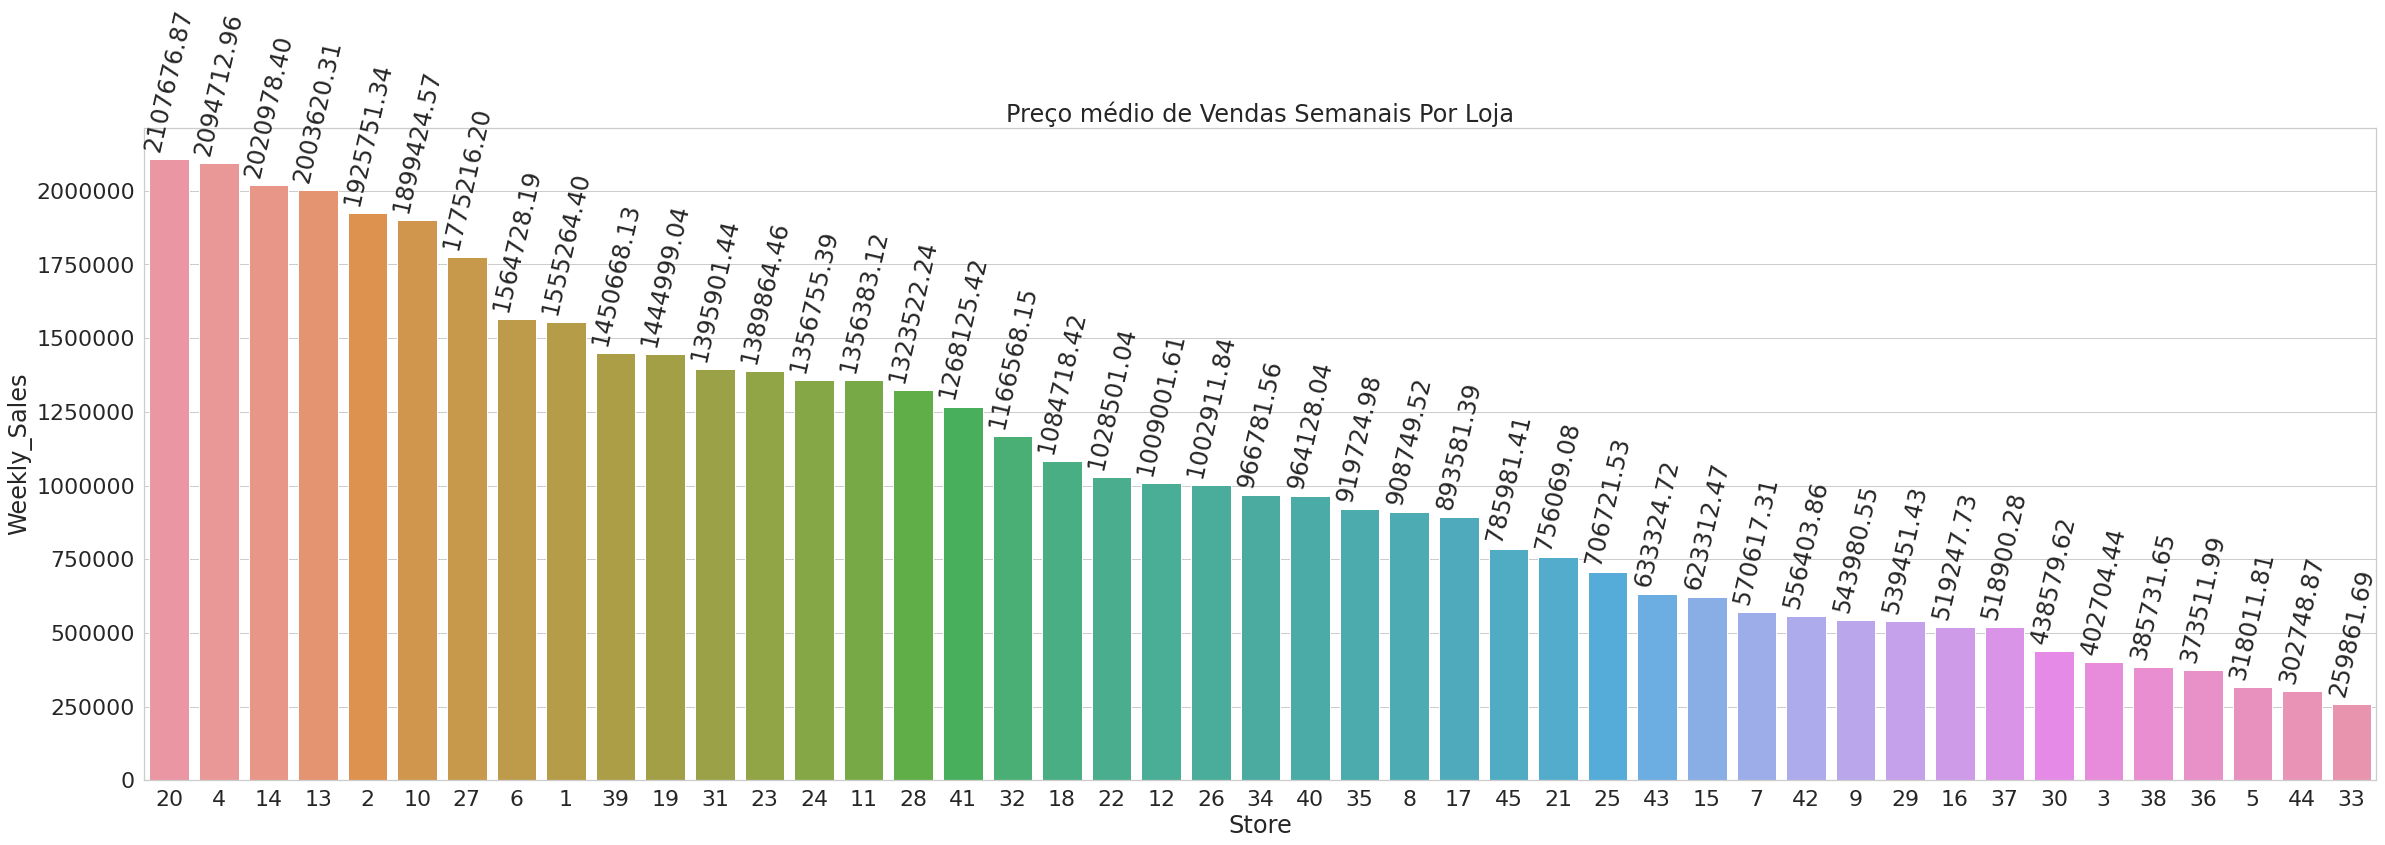

In [ ]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(40,12))
sns.barplot(data=average_sales, x='Store', y='Weekly_Sales', order=average_sales.sort_values(by='Weekly_Sales', ascending=False)['Store']).set_title('Preço médio de Vendas Semanais Por Loja')
plt.ticklabel_format(style='plain', axis='y')
sns.set(font_scale=2)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', xy=(p.get_x() + p.get_width() / 2., height), xytext=(0, 5),
                textcoords="offset points", ha='center', va='bottom', rotation=77)

plt.show()


# Sabemos que nossa loja com maior número de vendas é a **20**, sua média por semana é de $2.107.676,87


In [ ]:
#Agrupando em todos os resultados de vendas da loja 20

df_02 = df_01
vendas_loja_20 = df_02[(df_02['Store'] == 20)]

In [ ]:
# Quantidade de semanas que ultrapassaram o valor da média

vendas_ultrpassou_da_media = df_02[(df_02['Store'] == 20) & (df_02['Weekly_Sales'] >= 2107676.87 )].count()
vendas_ultrpassou_da_media

Store           52
Date            52
Weekly_Sales    52
Holiday_Flag    52
Temperature     52
Fuel_Price      52
CPI             52
Unemployment    52
dtype: int64

#Loja 20 ultrapassou 52 vezes a média de vendas


Para melhor visualização plotamos um gráfico onde a linha vermelha significa nossa média.


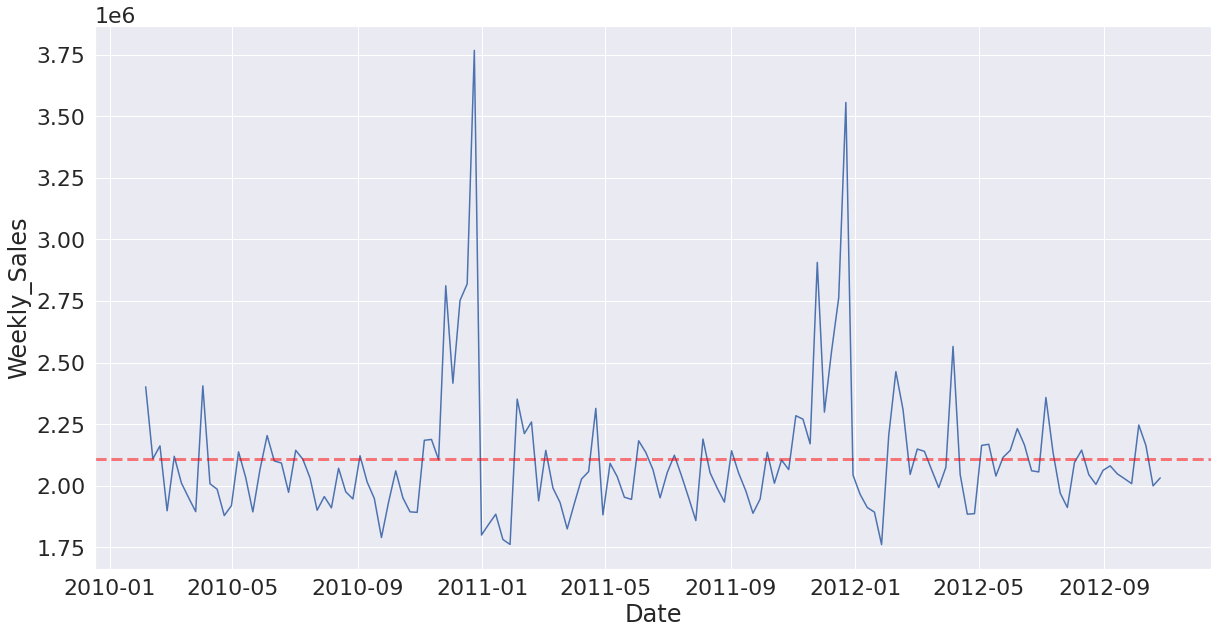

In [ ]:
#linewidth=4 é a grossura da nossa linha média, Alpha=0.5 é a transparência

fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=vendas_loja_20, x='Date', y='Weekly_Sales' )
ax.axhline(y=2107676.87, color='red', linestyle='--', alpha=0.5, linewidth=3);

# Criando filtros do nosso DataFrame principal para sabermos quais as maiores correlações por ano.

In [ ]:
vendas_2010 = df_01[(df_01['Date'] >= '01/01/2010') & (df_01['Date'] <= '12/31/2010')]
vendas_2011 = df_01[(df_01['Date'] >= '01/01/2011') & (df_01['Date'] <= '12/31/2011')]
vendas_2012 = df_01[(df_01['Date'] >= '01/01/2012') & (df_01['Date'] <= '12/31/2012')]

# Para termos correlações mais assertivas iremos primeiro filtrar nosso DataFrame por ano e assim puxar a função de **corr()** que mostrará a correlação entre meus dados.

In [ ]:
dfc_02 = vendas_2010[['Store','Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']]
dfc_02 = dfc_02.corr()

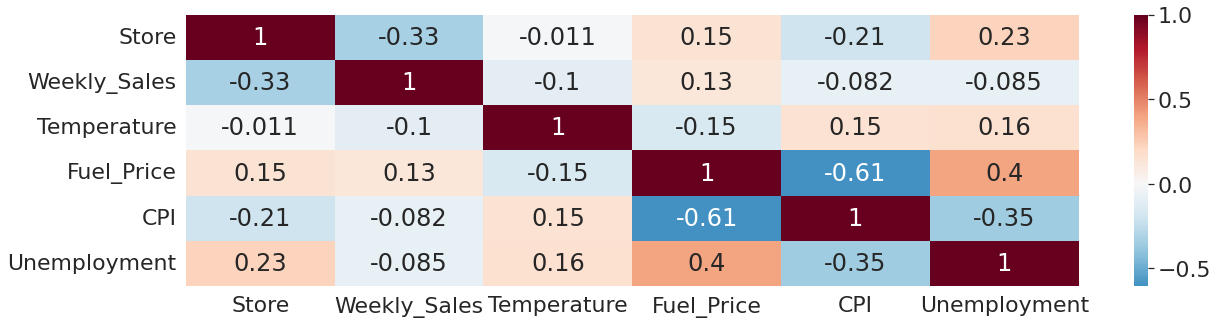

In [ ]:
#Heat Map 2010
fig, axes = plt.subplots(figsize=(20,5))
sns.heatmap(dfc_02, annot=True, cmap='RdBu_r', center=0);

# Em nosso HeatMap de 2010 notamos que a maior correlação está entre o Fuel Prece pois com o aumento do preço do combustível consequentimente menos pessoas iram usar seus carros para irem ao Walmart.



In [ ]:
dfc_03 = vendas_2011[['Store','Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']]
dfc_03 = dfc_03.corr()

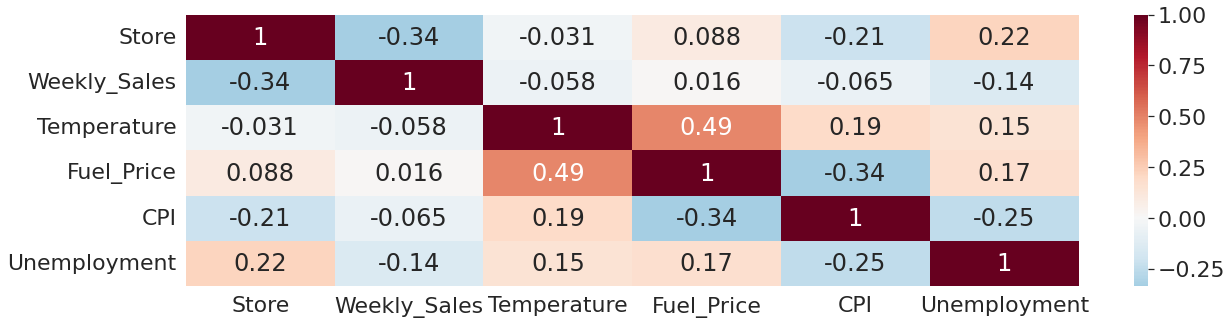

In [ ]:
#Heat Map 2011
fig, axes = plt.subplots(figsize=(20,5))
sns.heatmap(dfc_03, annot=True, cmap='RdBu_r', center=0);

## Em Nosso HeatMap de 2011 vemos que uma mudança significativa, pois a nossa maior correlação é negativa, a taxa de Desemprego (Unemployment) está menor, isso afeta diretamente nas vendas, pois com menos pessoas empregadas menos pessoas para ir as lojas.

In [ ]:
dfc_04 = vendas_2012[['Store','Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']]
dfc_04 = dfc_04.corr()

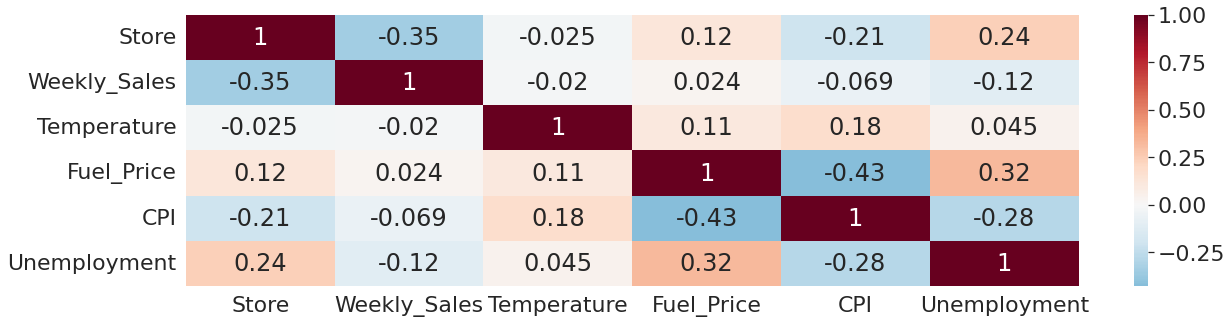

In [ ]:
#Heat Map 2012
fig, axes = plt.subplots(figsize=(20,5))
sns.heatmap(dfc_04, annot=True, cmap='RdBu_r', center=0);

# No ano de 2012 a nossa maior correlação continua sendo a mesma de 2011 a taxa de desemprego segue sendo a maior causa de queda de vendas, e sendo ela à principal correlação do nosso DataFrame.

# Para plotarmos um gráfico onde ele deve apresentar as vendas totais por período e separados pelo máximo de vendas a media e o mínimo.

Primeiro agrupamos por cada grupo de separação.

In [ ]:
#MAX
vendas_max = df_01.groupby(['Store', pd.Grouper(key='Date', freq='M')])['Weekly_Sales'].max().to_frame().reset_index()
vendas_max = vendas_max.rename(columns={'Weekly_Sales': 'Max_Sales'})
#MIN
vendas_min = df_01.groupby(['Store', pd.Grouper(key='Date', freq='M')])['Weekly_Sales'].min().to_frame().reset_index()
vendas_min = vendas_min.rename(columns={'Weekly_Sales': 'Min_Sales'})
#MEAN
vendas_mean = df_01.groupby(['Store', pd.Grouper(key='Date', freq='M')])['Weekly_Sales'].mean().to_frame().reset_index()
vendas_mean = vendas_mean.rename(columns={'Weekly_Sales': 'Mean_Sales'})

Após termos todas nossas variavéis com os valores que queremos, iremos concatenar todas em apenas um DataFrame para plotarmos todas esse medidas em apenas um gráfico.

In [ ]:
medias_mensais01 = pd.concat([vendas_max['Max_Sales'],vendas_min['Min_Sales'], vendas_mean['Mean_Sales'], vendas_mean['Date'], vendas_mean['Store'] ], axis=1)

# Sabemos a data de cada evento e o período que ele acontece, sendo assim, iremos ressaltar nosso gráfico de vendas utilizando a função **ax.axvline()** ela vai fazer uma linha vertical tracejada no período que o evento aconteceu, e a função **ax.text()** passa o nome do nosso evento para melhor visualização

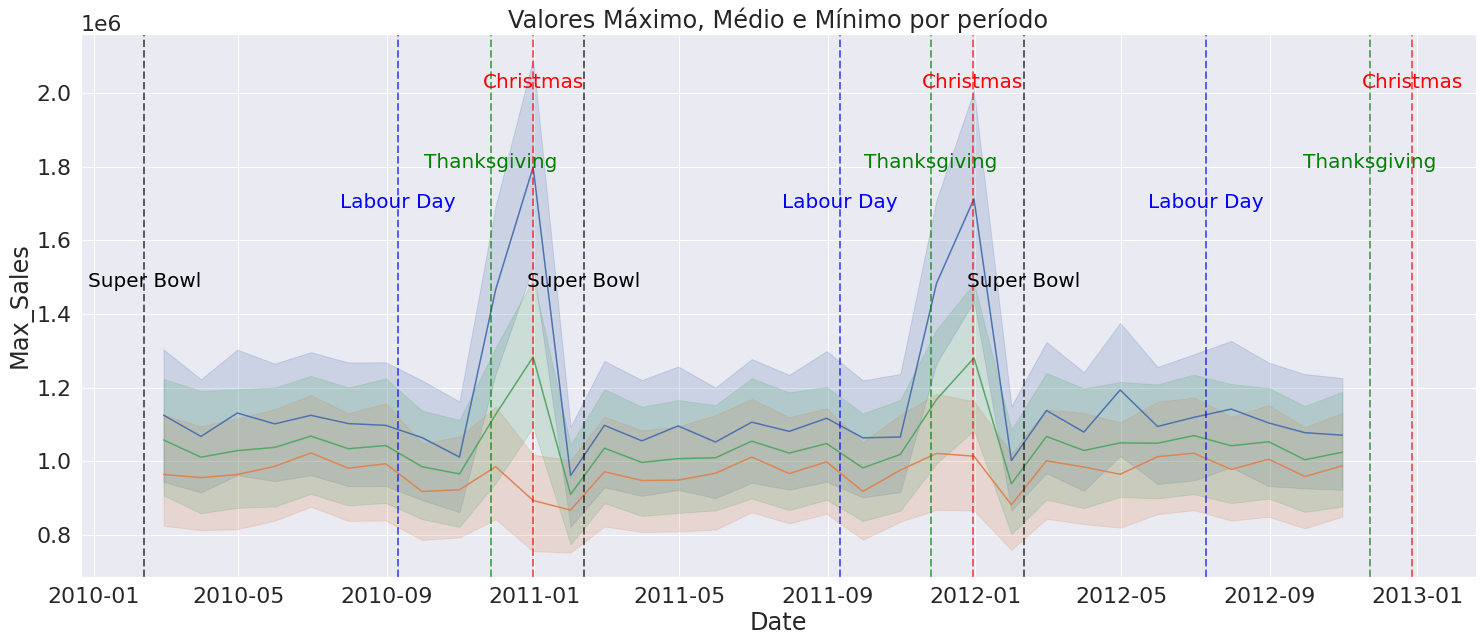

In [ ]:
fig, ax = plt.subplots(figsize=(25,10))
sns.lineplot(data=medias_mensais01, x='Date', y='Max_Sales')
sns.lineplot(data=medias_mensais01, x='Date', y='Min_Sales')
sns.lineplot(data=medias_mensais01, x='Date', y='Mean_Sales').set_title('Valores Máximo, Médio e Mínimo por período')

date_SuperBowl = ['02/12/2010', '02/11/2011', '02/10/2012']
date_SB = [datetime.strptime(date_str, '%m/%d/%Y') for date_str in date_SuperBowl]
for date_obj in date_SB:
    ax.axvline(x=date_obj, color='black', linestyle='--', alpha=0.6, linewidth=2)
    ax.text(date_obj, ax.get_ylim()[1]*0.70, 'Super Bowl', color='black', fontsize=20, ha='center', va='top')

date_LabourDay = ['09/10/2010','09/11/2011','07/10/2012']
date_LD = [datetime.strptime(date_str, '%m/%d/%Y') for date_str in date_LabourDay]
for date_obj in date_LD:
    ax.axvline(x=date_obj, color='Blue', linestyle='--', alpha=0.6, linewidth=2)
    ax.text(date_obj, ax.get_ylim()[1]*0.80, 'Labour Day', color='Blue', fontsize=20, ha='center', va='top')

date_Thanksgiving = ['11/26/2010', '11/25/2011', '11/23/2012']
date_TG = [datetime.strptime(date_str, '%m/%d/%Y') for date_str in date_Thanksgiving]
for date_obj in date_TG:
    ax.axvline(x=date_obj, color='Green', linestyle='--', alpha=0.6, linewidth=2)
    ax.text(date_obj, ax.get_ylim()[1]*0.85, 'Thanksgiving', color='Green', fontsize=20, ha='center', va='top')

date_Christmas = ['12/31/2010', '12/30/2011', '12/28/2012']
date_CM = [datetime.strptime(date_str, '%m/%d/%Y') for date_str in date_Christmas]
for date_obj in date_CM:
    ax.axvline(x=date_obj, color='Red', linestyle='--', alpha=0.6, linewidth=2)
    ax.text(date_obj, ax.get_ylim()[1]*0.95, 'Christmas', color='Red', fontsize=20, ha='center', va='top')



# Nosso maior indice de vendas está vinculado ao feriado **Christmas** em segundo lugar vem **Thanksgiving** em seguida **Labour Day** e por último o que menos tem influência de vendas é **Super Bowl**

# Para acharmos as melhores lojas para expansão precisamos juntar todos os nossos insights. Sabemos as lojas que mais vendem, agora devemos levar em consideração a correlação com a taxa de desemprego.

Puxando a média da taxa de desemprego do df principal.  

In [ ]:
tax_desem = df_01.groupby('Store')['Unemployment'].mean().reset_index()

Ainda utilizando nossa variável medias_mensais01, vamos fazer meio que um Left Join para colocarmos nossa média de taxa de desemprego em cada loja.

In [ ]:
medias_mensais02 = pd.merge(medias_mensais01, tax_desem[['Store', 'Unemployment']], on='Store', how='left')


In [ ]:
medias_mensais02['Unemployment'].mean()

7.999151048951049

Arredondando nossa média para ** 7** pois queremos visualizar as lojas abaixo da média de desemprego.


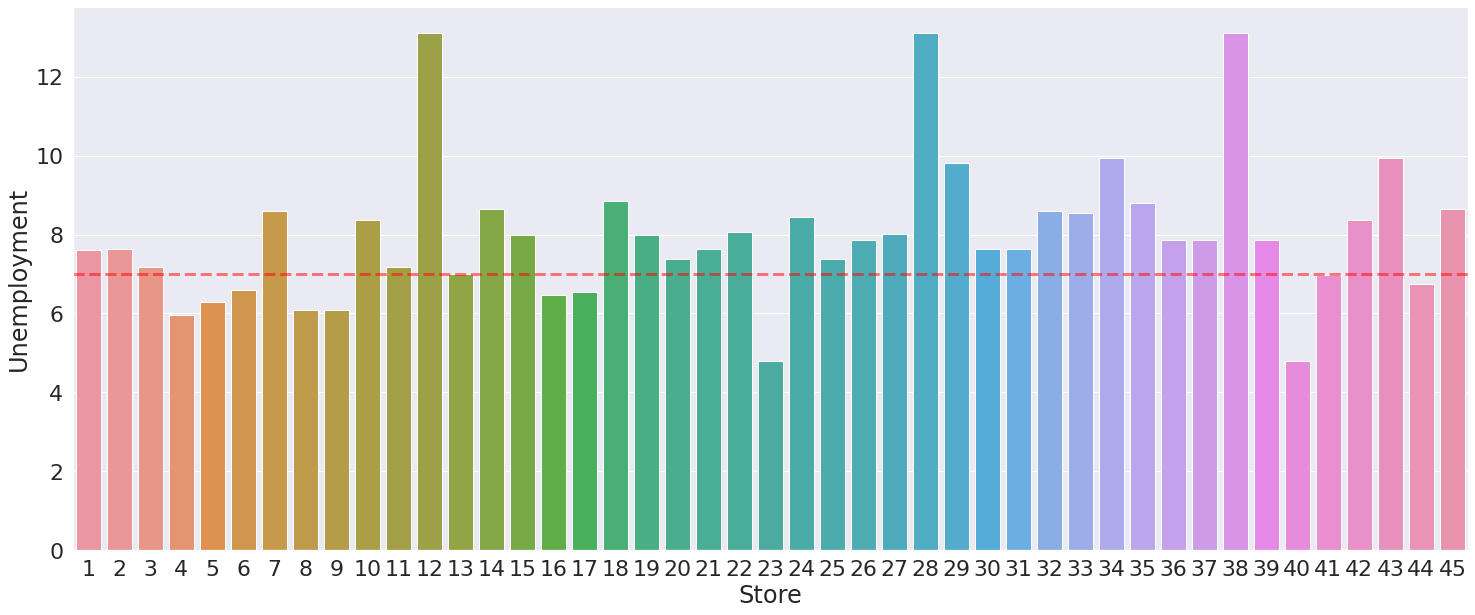

In [ ]:
fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(data=medias_mensais02, x='Store',y='Unemployment').order=medias_mensais02.sort_values(by='Unemployment', ascending=False)
ax.axhline(y=7, color='red', linestyle='--', alpha=0.5, linewidth=3);


# Nossas lojas que ficaram abaixo da média de taxa de desemprego foram as 4,5,6,8,9,16,17,23,40,44

In [ ]:
df_04 = df_02.groupby('Store')['Weekly_Sales'].sum().reset_index()

Filtrando apenas nossas lojas desejadas com a função isin()


In [ ]:
lojas = [4,5,6,8,9,16,17,23,40,44]
df_lojas = df_04[df_04['Store'].isin(lojas)]

# Por último o parâmetro considerando a quantidade de vendas, as lojas que eu indicaria para o meu cliente seria as seguintes **4, 6 e 23**

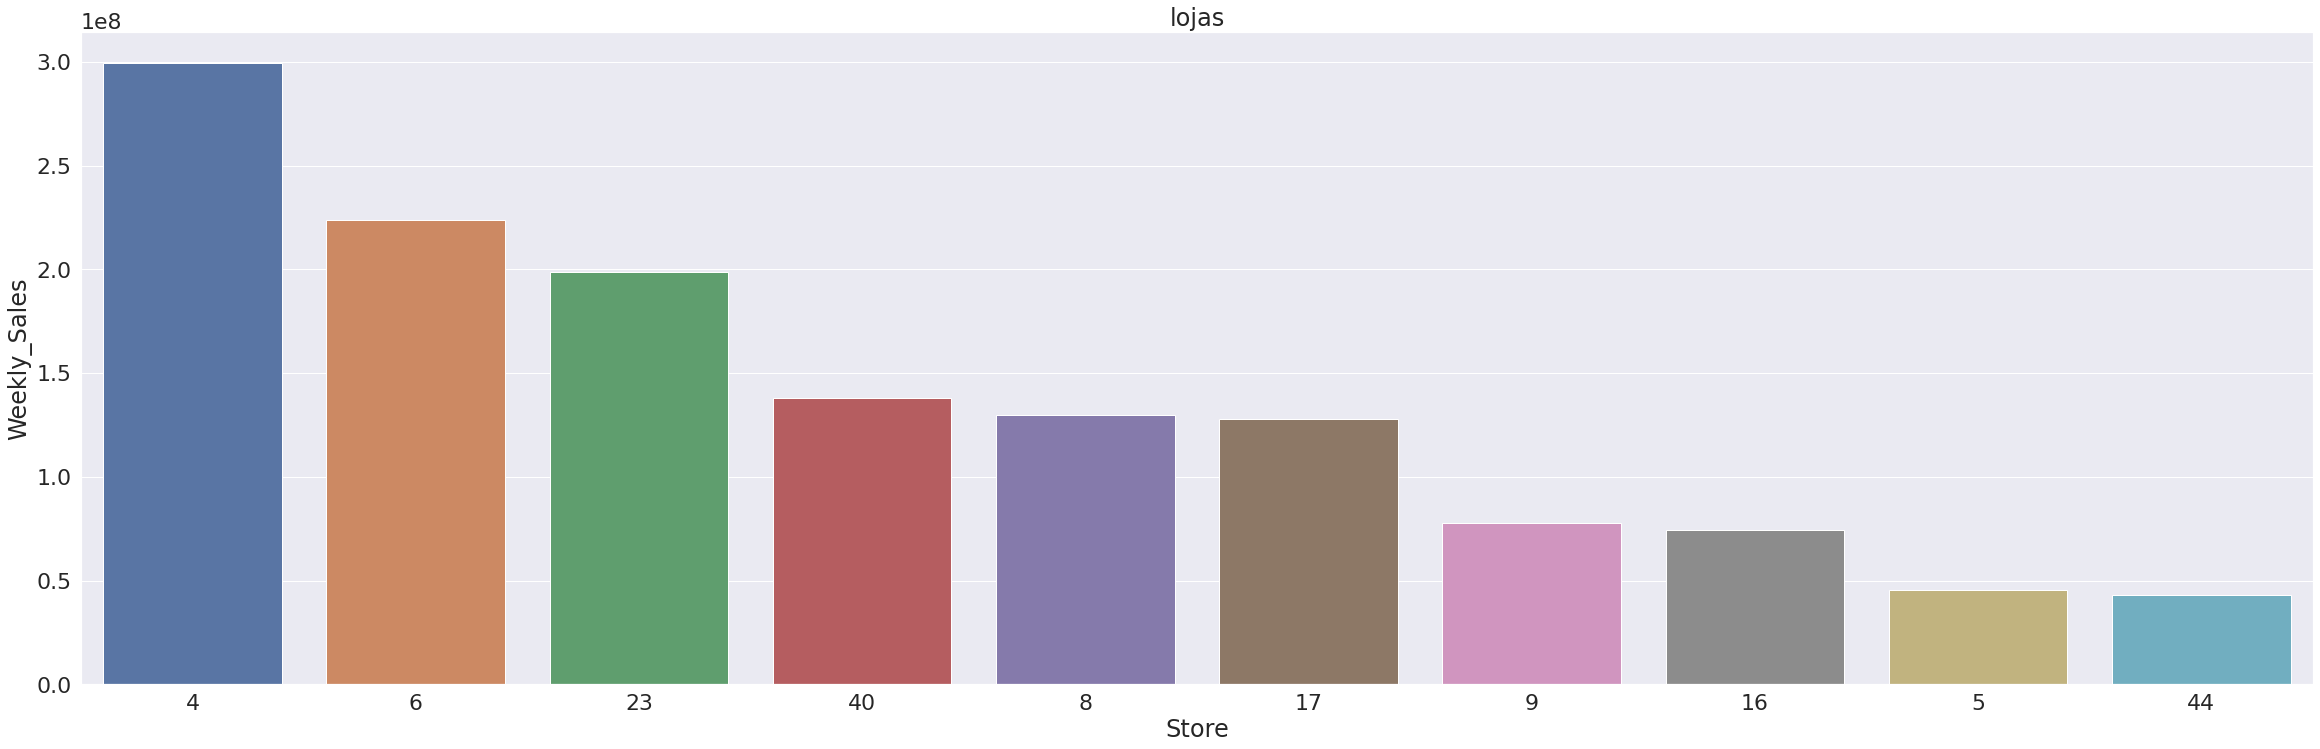

In [ ]:
fig, ax = plt.subplots(figsize=(40,12))
sns.barplot(data=df_lojas, x='Store', y='Weekly_Sales', order=df_lojas.sort_values(by='Weekly_Sales', ascending=False)['Store']).set_title('lojas');

# Levando em consideração todos os nossos passos como correlações, valores abaixo da média datas comemorativas, períodos que mais vende entre outros parâmetros, foi essas as lojas com melhore potencial de retorno e expansão.

---

